In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("./dataset/customer_churn_dataset-testing-master.csv")

In [14]:
df.shape

(64374, 12)

In [28]:
#Perform one-hot encoding
df_gender = pd.get_dummies(df['Gender'], prefix='Gender')
df = df.join(df_gender)
df.drop(columns='Gender', inplace=True)

df_subscription_type = pd.get_dummies(df['Subscription Type'], prefix='Subscription Type')
df = df.join(df_subscription_type)
df.drop(columns='Subscription Type', inplace=True)

df_contract_length = pd.get_dummies(df['Contract Length'], prefix='Contract Length')
df = df.join(df_contract_length)
df.drop(columns='Contract Length', inplace=True)

In [29]:

corr_matrix = round(df.corr(),5)
corrs = corr_matrix['Churn']
corrs_sorted = corrs.sort_values(ascending=False)
corrs_sorted

Churn                         1.00000
Payment Delay                 0.55739
CustomerID                    0.52983
Support Calls                 0.30463
Tenure                        0.19533
Gender_Female                 0.16455
Age                           0.06346
Contract Length_Monthly       0.06146
Subscription Type_Basic       0.01287
Subscription Type_Standard   -0.00054
Last Interaction             -0.00282
Subscription Type_Premium    -0.01233
Contract Length_Annual       -0.01628
Contract Length_Quarterly    -0.04600
Total Spend                  -0.07887
Usage Frequency              -0.11510
Gender_Male                  -0.16455
Name: Churn, dtype: float64

In [31]:
df[df['Age']>50].head(100)

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Female,Gender_Male,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
4,5,53,58,24,9,2,533,18,0,1,0,0,0,1,1,0,0
7,8,54,36,11,0,18,323,16,0,1,0,0,0,1,0,1,0
9,10,65,8,4,2,23,995,10,0,0,1,1,0,0,1,0,0
11,12,56,13,23,5,14,187,1,0,0,1,1,0,0,0,0,1
14,15,59,21,17,2,14,663,15,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,285,55,28,11,0,21,741,4,1,1,0,0,1,0,0,1,0
286,287,61,46,5,2,3,501,21,0,0,1,0,1,0,1,0,0
295,296,52,33,27,0,19,719,18,0,0,1,1,0,0,0,1,0
303,304,52,9,2,5,3,592,24,1,1,0,0,1,0,0,1,0


In [26]:
age_above_50 = df[df['Age']>50].drop(columns=['CustomerID'])
age_less_50 = df[df['Age']<50].drop(columns=['CustomerID'])

no_churn = df[(df['Age']>50) & (df['Churn']==0)]

yes_churn = df[(df['Age']>50) & (df['Churn']==1)]


# (df['A'] > 5) & (df['B'] < 10)
# no_churn_corr = no_churn.corr()

# no_churn_corr['Churn']

# age_above_50.corr()['Churn'].sort_values(ascending=False)
age_less_50.corr()['Churn'].sort_values(ascending=False)



/var/folders/8r/mdwfg40d66b3dxg0sdj8rtwh0000gn/T/ipykernel_91479/1454277504.py:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  age_less_50.corr()['Churn'].sort_values(ascending=False)


Churn               1.000000
Payment Delay       0.613166
Support Calls       0.281839
Tenure              0.209499
Age                 0.000131
Last Interaction   -0.005010
Usage Frequency    -0.043683
Total Spend        -0.088293
Name: Churn, dtype: float64

<Axes: xlabel='Age', ylabel='Churn'>

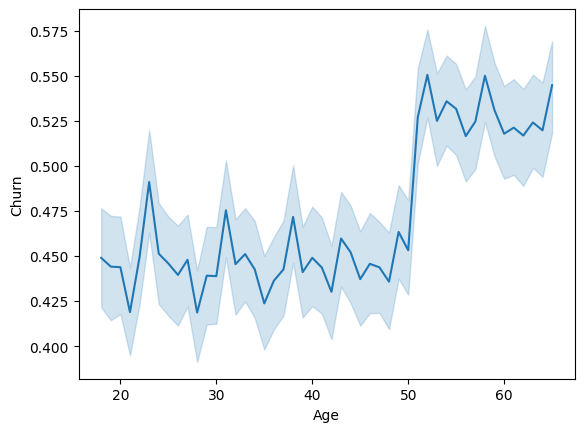

In [5]:
sns.lineplot(x=df['Age'], y=df['Churn'])


In [11]:
df[df['Age']>50]["Churn"].nunique

<bound method IndexOpsMixin.nunique of 4        0
7        0
9        0
11       0
14       0
        ..
64361    1
64363    1
64366    1
64367    1
64373    1
Name: Churn, Length: 21358, dtype: int64>

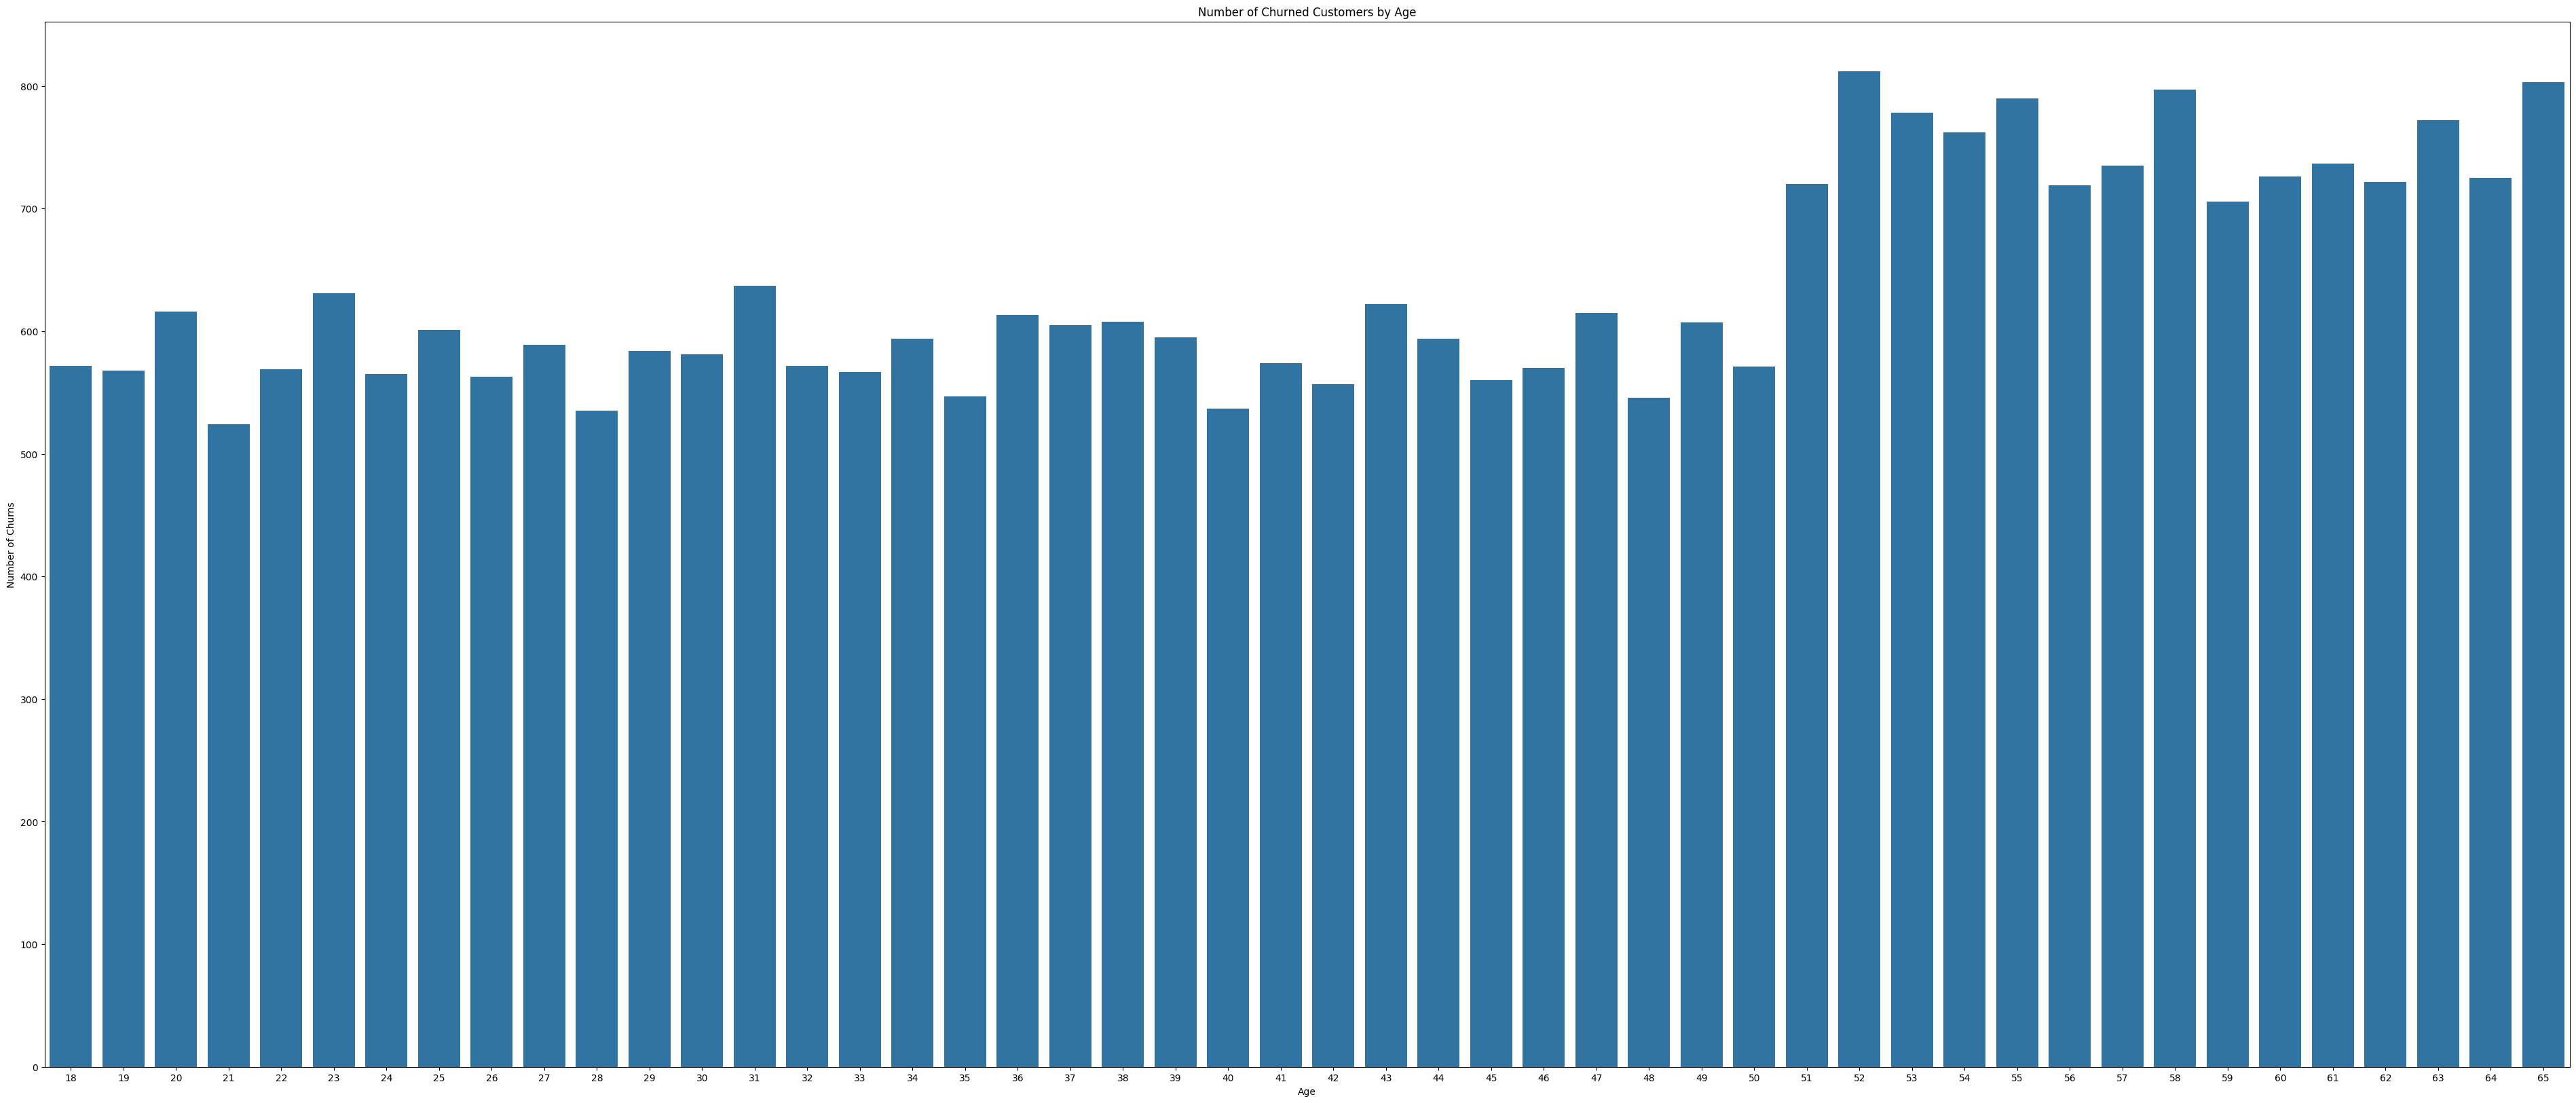

In [13]:
def churn_rate_by_col(col:str):
    churn = df[df['Churn']==1]

    length = df[col].nunique()


    churn_count_by_col = churn.groupby(col).size().reset_index(name='Churn Count')

    
    # Create a bar plot
    plt.figure(figsize=(length, 20))
    sns.barplot(x=f'{col}', y='Churn Count', data=churn_count_by_col)

    # Add titles and labels
    plt.title(f'Number of Churned Customers by {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('Number of Churns')

    # Show the plot
    plt.show()



# churn_rate_by_col("Total Spend")
churn_rate_by_col("Age")